Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

Подберите параметры модели SARIMAX для этого ряда.

Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Возмите вариант 1 или 2

            Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
            Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )
Оцените результат моделирования

Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import warnings

import seaborn as sns

In [42]:
data=pd.read_csv('my_PJME_MW.csv')

In [43]:
DT = pd.to_datetime(data['Date'])


In [44]:
DT

0        2002-01-01
1        2002-01-01
2        2002-01-01
3        2002-01-01
4        2002-01-01
            ...    
145369   2018-08-02
145370   2018-08-02
145371   2018-08-02
145372   2018-08-02
145373   2018-08-03
Name: Date, Length: 145374, dtype: datetime64[ns]

In [45]:
data.index=DT

In [48]:
data.drop(['Date'], inplace=True, axis=1)

In [49]:
data

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02,20:00:00,44057.0,2018,8,2,3,214,31,3,20,0,0,0
2018-08-02,21:00:00,43256.0,2018,8,2,3,214,31,3,21,0,0,0
2018-08-02,22:00:00,41552.0,2018,8,2,3,214,31,3,22,0,0,0


In [50]:
data_m=data.resample('M').mean()

In [51]:
data_m

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-30,27353.266667,2018.0,4.0,15.500000,2.0,105.500000,15.500000,3.000000,11.500000,0.000000,0.000000,0.000000
2018-05-31,28599.951613,2018.0,5.0,16.000000,2.0,136.000000,19.870968,2.903226,11.500000,0.032258,0.032258,0.032258
2018-06-30,32014.469444,2018.0,6.0,15.500000,2.0,166.500000,24.200000,3.100000,11.500000,0.000000,0.000000,0.000000


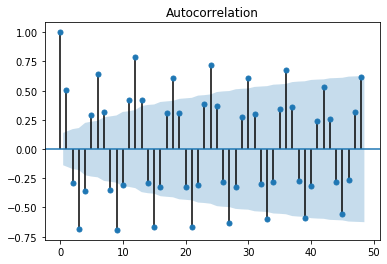

In [75]:
sm.graphics.tsa.plot_acf(data_m['PJME_MW'].values, lags=24*2)
plt.show()

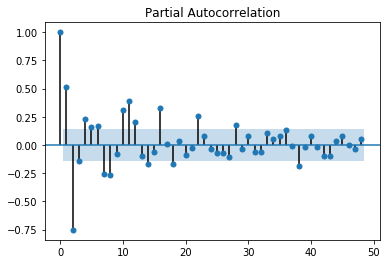

In [76]:
sm.graphics.tsa.plot_pacf(data_m['PJME_MW'].values, lags=24*2)
plt.show()

In [91]:
test = sm.tsa.adfuller(data_m['PJME_MW'])
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -1.9529633722403377
p-value:  0.3075699120999718
Critical values:  {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}
есть единичные корни, ряд не стационарен


Возьмем первые разности

In [92]:
data_m_diff1=data_m['PJME_MW'].diff(1).dropna()

In [93]:
test = sm.tsa.adfuller(data_m_diff1)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -6.098227372855475
p-value:  9.980345490646901e-08
Critical values:  {'1%': -3.466398230774071, '5%': -2.8773796387256514, '10%': -2.575213838610586}
единичных корней нет, ряд стационарен


d=1

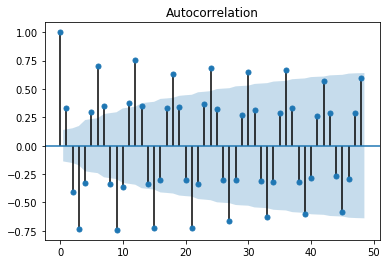

In [94]:
sm.graphics.tsa.plot_acf(data_m_diff1, lags=24*2)
plt.show()

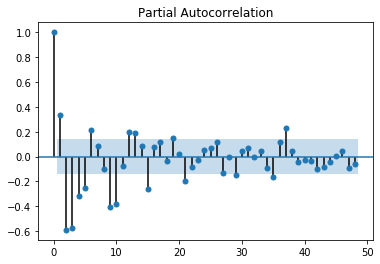

In [95]:
sm.graphics.tsa.plot_pacf(data_m_diff1, lags=24*2)
plt.show()

Анализируем сезонность

In [96]:
data_m_diff1_season = data_m_diff1.diff(12).dropna()

In [97]:
test = sm.tsa.adfuller(data_m_diff1_season)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -6.794675579556098
p-value:  2.317153578925011e-09
Critical values:  {'1%': -3.468952197801766, '5%': -2.878495056473015, '10%': -2.57580913601947}
единичных корней нет, ряд стационарен


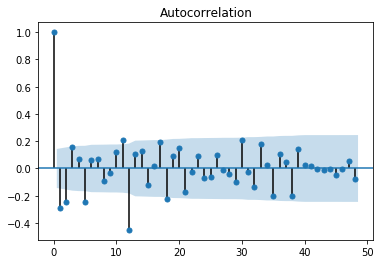

In [98]:
sm.graphics.tsa.plot_acf(data_m_diff1_season, lags=24*2)
plt.show()

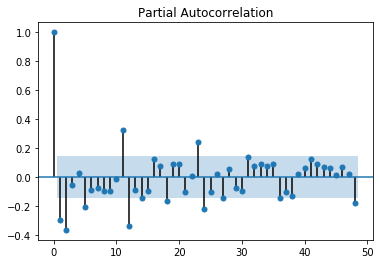

In [101]:
sm.graphics.tsa.plot_pacf(data_m_diff1_season, lags=24*2)
plt.show()

In [126]:
q = 6
p = 24
d = 1
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель
qs = 1
ps = 4
ds = 1
seasonal_pdq = [ps, ds, qs ,12] 

In [127]:
print('SARIMAX: p,d,q=',pdq,'   : ps,ds,qs, S=', seasonal_pdq)

SARIMAX: p,d,q= [24, 1, 6]    : ps,ds,qs, S= [4, 1, 1, 12]


In [128]:
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

SARIMAX[24, 1, 6]x[4, 1, 1, 12] - AIC:1826.949268726728


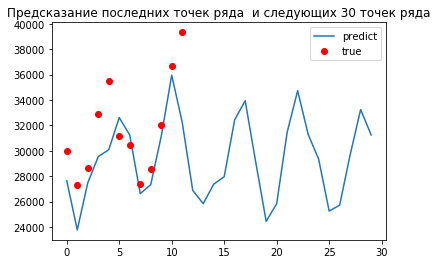

In [129]:
nforecast = 30  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = results.forecast(nforecast)    #делаем предсказание на 30 точtк от текущего конца ряда


plt.plot(pred_dynamic, label='predict' )

#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

In [132]:
print(results.summary().tables[0],results.summary().tables[1])

                                  Statespace Model Results                                 
Dep. Variable:                                   y   No. Observations:                  188
Model:             SARIMAX(24, 1, 6)x(4, 1, 1, 12)   Log Likelihood                -877.475
Date:                             Fri, 07 Aug 2020   AIC                           1826.949
Time:                                     16:50:19   BIC                           1921.800
Sample:                                          0   HQIC                          1865.367
                                             - 188                                         
Covariance Type:                               opg                                         
=========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

SARIMAX[2, 1, 2]x[0, 1, 2, 12] - AIC:2630.5999685191805


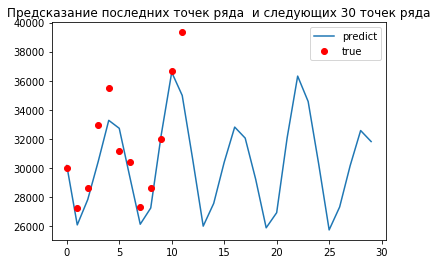

In [140]:

p = 2
d = 1
q = 2
pdq = [p, d, q]
# определим комбинации сезонных параметров p, q и q, 
#будем работать с недельными данными, тогда сезонность это 26 недель

ps = 0
ds = 1
qs = 2
seasonal_pdq = [ps, ds, qs ,12] 
warnings.filterwarnings("ignore") # отключает предупреждения

mod = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'].values[:-12],order=pdq,
                                seasonal_order=seasonal_pdq ,
                                enforce_stationarity= False ,
                                enforce_invertibility=False)
results = mod.fit()
print('SARIMAX{}x{} - AIC:{}'.format(pdq, seasonal_pdq, results.aic))

nforecast = 30  # полное число предиктов (тест+ чистый предикт)

pred_dynamic = results.forecast(nforecast)    #делаем предсказание на 30 точtк от текущего конца ряда


plt.plot(pred_dynamic, label='predict' )

#Отобразим истинный значения 
plt.plot(data_m['PJME_MW'].values[-12:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 30 точек ряда')
plt.legend()

plt.show()

In [141]:
print(results.summary().tables[0],results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(2, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1308.300
Date:                            Fri, 07 Aug 2020   AIC                           2630.600
Time:                                    16:59:22   BIC                           2651.580
Sample:                                         0   HQIC                          2639.124
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

In [117]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [119]:
warnings.filterwarnings("ignore") # отключает предупреждения
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod_test = sm.tsa.statespace.SARIMAX(data_m['PJME_MW'],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod_test.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4699.195491264933
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4290.0404648722015
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3987.1764435561818
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3372.7214168798077
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:3143.066928715246
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2904.7464905698243
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4534.039921070073
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4225.338467513269
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3947.2810695602143
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3330.6866857595196
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:3103.470814032788
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2869.803852147408
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4478.92108880528
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3776.199553174468
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3924.804408772421
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3315.678672510625
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:3087.8480678871733
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2854.2202541760616
ARIMA(0, 1, 0)x(0, 0,

ARIMA(2, 2, 1)x(0, 0, 1, 12)3 - AIC:3432.2931779872683
ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:3202.5266263316053
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3379.4773584356826
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:3095.259447008946
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2850.1160831990355
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3558.502233893444
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3335.320876492985
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:3121.408219633614
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3359.0733970968786
ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:3067.2427627273955
ARIMA(2, 2, 2)x(0, 1, 2, 12)3 - AIC:2855.5528394017692


Вопрос 1. Я так до конца и не разобрался, как нужно устанавлить диапазоны значений pdq, особенно сезонных, поэтому я воспользовался информацией с хабра, там очень убобно алгоритм назначений pdq прописали. Но по этому алгоритму значения pdq могут быть очень большими.

Автоматический подбор параметров по небольшим значениям, предложенным в лекции, не дал результат лучше, чем ручная настройка параметров исходя из анализа графиков (https://habr.com/ru/post/210530/), хоть при такой настройке значения бывают и большими. Таким образом оставляем первоначально в ручную настроенную модель SARIMAX[24, 1, 6]x[4, 1, 1, 12] - AIC:1826.9491964495626 

Вопрос к дз:
Результат сложной модели с большими значениями по AIC поулчился существенно лучше, чем у модели, с маленькими значениями pdq. Но статистика модели показывает, что значения коэффициента P у сложной модели очень большие, на уроке вы сказали, что это очень плохо и их нужно убирать. Как быть в этом случае? 

Так как количество данных на месячном ресемпле существенно меньше, чем на недельном, то предстказанные значения при оценке модели на глаз, оказались хуже, чем на недельном. AIC ожидаемо оказался меньше, так как данных в модели физически меньше.

In [3]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


In [4]:
brent_w=brent_data.resample('W').mean()

In [31]:
brent_m=brent_data.resample('M').mean()

In [5]:
brent_w_diff=brent_data.resample('W').mean().diff(1).dropna()

In [6]:
brent_w_diff

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-12,1.057333,0.0,0.000000,5.500000,0.000000,5.500000,1.0,-1.500000,0.166667,-0.200000,0.166667
2010-09-19,1.020000,0.0,0.000000,7.166667,0.000000,7.166667,1.0,0.166667,-0.166667,0.000000,-0.166667
2010-09-26,-0.175000,0.0,0.000000,7.000000,0.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000
2010-10-03,2.693333,0.0,0.333333,-3.000000,0.333333,7.000000,1.0,0.000000,0.000000,0.000000,0.000000
2010-10-10,2.935000,0.0,0.666667,-13.000000,0.666667,7.000000,1.0,0.000000,0.000000,0.166667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-04,-0.526667,0.0,0.500000,-8.500000,0.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000
2019-08-11,-4.555000,0.0,0.500000,-8.500000,0.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000
2019-08-18,0.796667,0.0,0.000000,7.000000,0.000000,7.000000,1.0,0.000000,0.000000,0.000000,0.000000


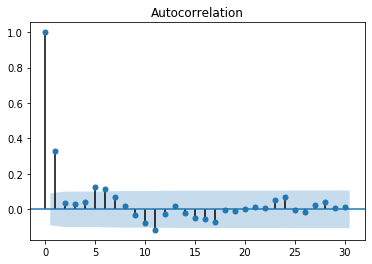

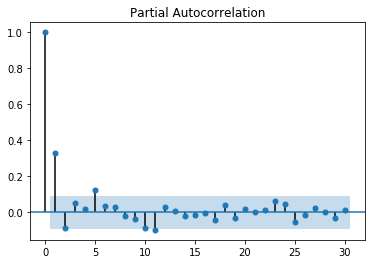

In [7]:
sm.graphics.tsa.plot_acf(brent_w_diff['Значение'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_w_diff['Значение'].values, lags=30)
plt.show()

In [26]:
# Определим p, d и q 
q = 2 #количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA
p = 11 # максимальный номер коэффициента сильно отличный от 0 в модели AR
d = 1 # Первая разность
pdq = [p, d, q]

N2=30
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(brent_w['Значение'].values[:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[11, 1, 2] - AIC:1875.2485058209982
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  440
Model:              SARIMAX(11, 1, 2)   Log Likelihood                -921.624
Date:                Fri, 07 Aug 2020   AIC                           1875.249
Time:                        17:55:14   BIC                           1940.194
Sample:                             0   HQIC                          1900.899
                                - 440                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  

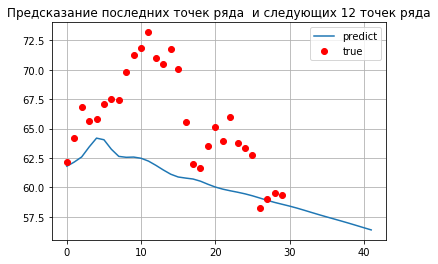

In [27]:
pred_dynamic = resultsb.forecast(42)    #делаем предсказание на 3 точки от текущего конца ряда

plt.plot(pred_dynamic, label='predict' )
#Отобразим истинный значения 
plt.plot(brent_w['Значение'].values[-30:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.plot()
plt.show()

Возникло два вопроса, у меня упорно не рисуются ACF PACF для ресемплинга брент на недели. С чем это может быть связано? Перезагружал уже комп, ничего не помогает. Хотя сам брент недельный совершенно нормальный датасет, месячный при этом рисуется ,мистика какя-то. Первые разницы для недельных нормально отрисовываются, вот именно сам недельный никак не хочет отрисовывать правильно.

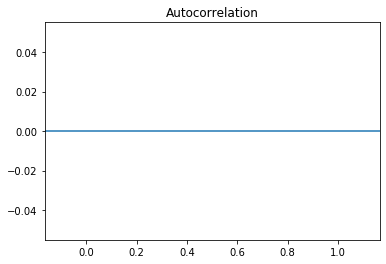

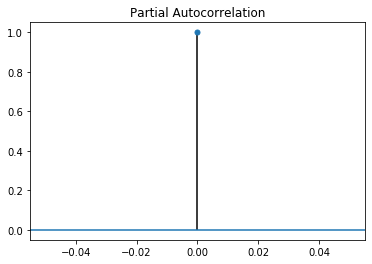

In [28]:
sm.graphics.tsa.plot_acf(brent_w['Значение'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_w['Значение'].values, lags=30)
plt.show()

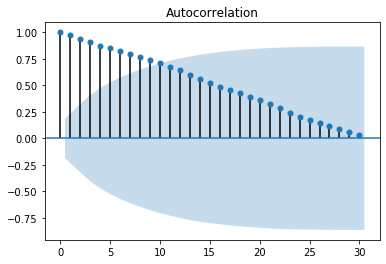

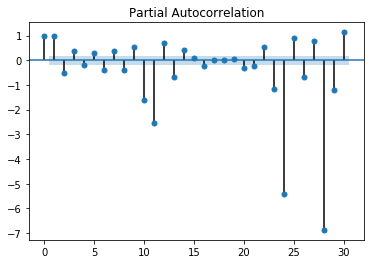

In [32]:
sm.graphics.tsa.plot_acf(brent_m['Значение'].values, lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(brent_m['Значение'].values, lags=30)
plt.show()

У меня не работает перебор параметров для арима, причем сверху такой же точно код успешно для энергии все перебирает, а тут как прокляли, он ен запускается, не выдет ошибок и тд. Я что-то упускаю? Код ниже.

In [23]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(brent_data['Значение'].values[:-100]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

Выводы по нефти.
Мне не понравилось, как арима строит модель. При этом, моя вроде как даже повторила изгибы, но как я не игрался с параметрами, она не добавляет туда интерсепт и модель не перемещается выше по графику, чтобы стать ближе к истинным значениям. Не удалось, к сожалению, автоматически перебрать параметры для арима, я писал выше, код просто отказывается запускаться.

В целом у меня очень смутные понимания того, что происходит. Я прочитал огромное кол-во разной литературы но мне все еще не хватает системности в работе с временными рядами. У меня нет понимания, как подбирать pdq spdq, я не понимаю, зачем мы на первых уроках сглаживали экспонециально и тд, мы это никак не используем в моделях. Я не понимаю, когда, как и зачем убирать сезонную компоненту (трендовую). Еще вопрос такой, если мы рассматривает недельный ресемпл допустим нефти, строим по недельной модель, то и предсказываем мы не наш ряд, а недельный ресемпл, верно? Нельзя обучить неедльный ресемпл а предсказывать на исходном, верно? Спасибо за ответы, очень хочется разобраться досконально но пока очень тяжело дается, хотя я уже и пересмотрел/перечитал все уроки по 2 раза и хабр излазил весь.